# Exercise 4: Introduction to Regression

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

## A Brief Introduction to Statsmodels

Next to sklearn, statsmodels is probably the most popular Python package for regression. While the focus of sklearn (will be covered later in class) rather lies machine learning applications, statsmodels (as the name suggests) has a rather statitics-oriented focus. We will briefly present the basic functionality of its regression functions by revisiting the Iris data set.

In [2]:
# read in data
df = pd.read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Example 1: Bivariate Prediction
We want to fit a regession model that estimates sepal length from sepal width.

In [5]:
# specify predictors X and target Y
y = df.sepal_length
X = df.sepal_width
# most importantly: we have to add a constant term to estimate the intercept
X = sm.add_constant(X)
X[:10]

,const,sepal_width
0,1.0,3.5
1,1.0,3.0
2,1.0,3.2
3,1.0,3.1
4,1.0,3.6
5,1.0,3.9
6,1.0,3.4
7,1.0,3.4
8,1.0,2.9
9,1.0,3.1


In [6]:
# initialize model: OLS = ordinary least squares
model = sm.OLS(y,X)
# fit model: only now te model, i.e. the parameters are computed
results = model.fit()

# print a summary, i.e. an overview on parameters and diagnostics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.792
Date:                Fri, 08 Nov 2019   Prob (F-statistic):              0.183
Time:                        10:37:39   Log-Likelihood:                -183.14
No. Observations:                 150   AIC:                             370.3
Df Residuals:                     148   BIC:                             376.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.4812      0.481     13.466      0.000       5.530       7.432
sepal_width    -0.2089      0.156     -1.339      0.183      -0.517       0.099
==============================================================================
Omnibus:                        4.455   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.252
Skew:                           0.356   Prob(JB):                        0.119
Kurtosis:                       2.585   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# get parameters of model, i.e. beta_0 and beta_1
params = results.params
params

const          6.481223
sepal_width   -0.208870
dtype: float64

In [8]:
# we can apply parameters to obtain the predictions of Y based on X
np.dot(X,params)

array([5.75017718, 5.85461233, 5.81283827, 5.8337253 , 5.72929015,
       5.66662906, 5.77106421, 5.77106421, 5.87549936, 5.8337253 ,
       5.70840312, 5.77106421, 5.85461233, 5.85461233, 5.64574204,
       5.56219392, 5.66662906, 5.75017718, 5.68751609, 5.68751609,
       5.77106421, 5.70840312, 5.72929015, 5.79195124, 5.77106421,
       5.85461233, 5.77106421, 5.75017718, 5.77106421, 5.81283827,
       5.8337253 , 5.77106421, 5.62485501, 5.60396798, 5.8337253 ,
       5.81283827, 5.75017718, 5.8337253 , 5.85461233, 5.77106421,
       5.75017718, 6.00082154, 5.81283827, 5.75017718, 5.68751609,
       5.85461233, 5.68751609, 5.81283827, 5.70840312, 5.79195124,
       5.81283827, 5.81283827, 5.8337253 , 6.00082154, 5.89638639,
       5.89638639, 5.79195124, 5.97993451, 5.87549936, 5.91727342,
       6.06348262, 5.85461233, 6.02170856, 5.87549936, 5.87549936,
       5.8337253 , 5.85461233, 5.91727342, 6.02170856, 5.95904748,
       5.81283827, 5.89638639, 5.95904748, 5.89638639, 5.87549

In [9]:
# unsurprisingly, statsmodels also provides a direct prediction function:
results.predict(X)

0      5.750177
1      5.854612
2      5.812838
3      5.833725
4      5.729290
5      5.666629
6      5.771064
7      5.771064
8      5.875499
9      5.833725
10     5.708403
11     5.771064
12     5.854612
13     5.854612
14     5.645742
15     5.562194
16     5.666629
17     5.750177
18     5.687516
19     5.687516
20     5.771064
21     5.708403
22     5.729290
23     5.791951
24     5.771064
25     5.854612
26     5.771064
27     5.750177
28     5.771064
29     5.812838
         ...   
120    5.812838
121    5.896386
122    5.896386
123    5.917273
124    5.791951
125    5.812838
126    5.896386
127    5.854612
128    5.896386
129    5.854612
130    5.896386
131    5.687516
132    5.896386
133    5.896386
134    5.938160
135    5.854612
136    5.771064
137    5.833725
138    5.854612
139    5.833725
140    5.833725
141    5.833725
142    5.917273
143    5.812838
144    5.791951
145    5.854612
146    5.959047
147    5.854612
148    5.771064
149    5.854612
Length: 150, dtype: floa

#### Example 2: Multivariate Regression
Now we want to include all other numerical columns from the data to fit to estimate sepal length.

In [10]:
# statsmodels also provides a formula syntax, which requires an additional import
from statsmodels.formula.api import ols

# formula syntax: dependent variable ~ predictor1 + predictor2 +.....
# note that intercept is fit automatically
model = ols("sepal_length ~ sepal_width + petal_width + petal_length", data=df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.0
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           6.28e-62
Time:                        10:37:59   Log-Likelihood:                -37.000
No. Observations:                 150   AIC:                             82.00
Df Residuals:                     146   BIC:                             94.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8451      0.250      7.368      0.000       1.350       2.340
sepal_width      0.6549      0.067      9.823      0.000       0.523       0.787
petal_width     -0.5626      0.127     -4.426      0.000      -0.814      -0.311
petal_length     0.7111      0.057     12.560      0.000       0.599       0.823
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.432
Skew:                           0.003   Prob(JB):                        0.806
Kurtosis:                       2.737   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# formula syntax: dependent variable ~ predictor1 + predictor2 +.....
# note that intercept is fit automatically

# add interaction and squared term
model = ols("sepal_length ~ sepal_width:petal_width + np.square(petal_length) + sepal_width + petal_width + petal_length", data=df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     186.9
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           4.20e-61
Time:                        10:38:03   Log-Likelihood:                -33.031
No. Observations:                 150   AIC:                             78.06
Df Residuals:                     144   BIC:                             96.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.0983      0.476      4.408      0.000       1.157       3.039
sepal_width:petal_width    -0.1255      0.100     -1.250      0.213      -0.324       0.073
np.square(petal_length)     0.0333      0.013      2.571      0.011       0.008       0.059
sepal_width                 0.6790      0.123      5.541      0.000       0.437       0.921
petal_width                -0.1154      0.344     -0.335      0.738      -0.796       0.565
petal_length                0.4470      0.117      3.821      0.000       0.216       0.678
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.276
Skew:                           0.021   Prob(JB):                        0.871
Kurtosis:                       2.794   Cond. No.                         483.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 1: Fitting an artificial data set

We want to implement OLS regression and test it on artificial data. Thus, in this task you may not yet use the statsmodels functions (except for checking results).

#### a) Creating artificial data
Create an artificial dataset which consists of:
* a vector $x$ consisting of 100 (float) values between 0 and 1
* a vector $y = 10x +\varepsilon$, in which for each element, the error $\varepsilon_i$ is drawn from the standard normal distribution.
Create a scatterplot of x against y!

In [15]:
# draw 1000 values from unitform distribution
X = np.random.uniform(0,1,100)

# create vector of 100 error values drawn from standard normal distribution
eps = np.random.normal(0,1,100)

# target vector
y = 10*X + eps

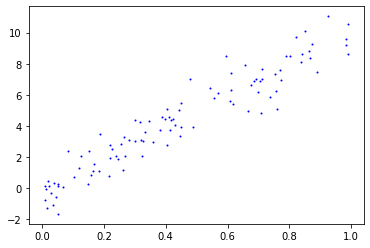

In [16]:
from matplotlib import pyplot as plt

#plot values, underlying model should be visible
plt.scatter(X, y, color = "blue", s=1)
plt.show()

#### b) Implementing OLS regression
Write a function that takes as input a numpy vector of target values $y$, and a matrix of predictors $X$, and returns the parameter vector $\beta$ resulting from OLS regression. Apply this function to fit a model on your artificial data, compute the predictions, and add the resulting regression line to the plot from a). Remember to add a constant term!

In [17]:
def lm_fit(y,X):
    A = np.linalg.inv(np.dot(X.T,X))
    C = np.dot(X.T,y)
    return np.dot(A,C)

# non-statsmodels way to add constant column
Xc = np.vstack([np.ones(len(X)),X]).T
beta = lm_fit(y,Xc)
print(beta) # betas are slightly off to what would be expected, this is due to variance in errors being relatively big

[-0.21193775 10.29099176]


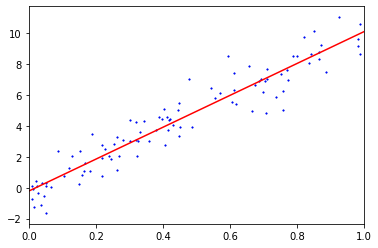

In [18]:
from matplotlib import pyplot as plt
plt.scatter(X,y, s = 0.5)

# plot regression line
xl = [0,1]
yl = [beta[0], beta[0] + beta[1]]
plt.plot(xl,yl, color = "red")

# plot observations
plt.scatter(X, y, color = "blue", s=1)
plt.xlim(0,1)
plt.show()

#### c) Diagnostics 1: The Bootstrap

Based on your regression function, write a function that again takes as input a predictor matrix $X$ and a target column $y$, plus a integer $N$, and bootstraps the data $N$ times to compute the 95% confidence interval for each parameter. Specifically, return one parameter vector for the bottom beta values, and one parameter vector for the top values. 
Apply this function to estimate the confidence intervals on our artificial data.

In [19]:
def lm_ci(y, X, N):
    m = X.shape[1]
    
    # parameter matrix, each row is the parameter vector of one model
    beta_all = np.zeros((N,m))
    n = len(y)
    
    #bootstrap: fit N models and save their parameters
    for i in range(N):
        ind = np.random.choice(np.arange(n),n)
        Xs = X[ind]
        ys = y[ind]
        beta_all[i] = lm_fit(ys,Xs)
        
    # most important fo CIs: sort al columns    
    for j in range(m):
        beta_all[:,j] = np.sort(beta_all[:,j])
    
    # get confidence intervals
    ci_low, ci_high = int(0.025*N-1), int(0.975*N-1) 
    
    # fit actual model
    beta = lm_fit(y,X)
        
    return (beta, beta_all[ci_low], beta_all[ci_high])

ci = lm_ci(y, Xc, 10000)
print(ci) # "true" beta = [0,10] in confidence interval

(array([-0.21193775, 10.29099176]), array([-0.5029775 ,  9.63416212]), array([ 0.09969174, 10.93911446]))


#### d) Diagnostics 2: The $R^2$ score.

Write a function that takes as input a ground truth vector y, its prediction y_hat, and computes the $R^2$ value of that prediction! Does your model explain most of the variance in the artificial data?

In [20]:
def R_sq(y,y_hat):
    rss = np.sum((y-y_hat)**2)
    mu = np.mean(y)
    tss = np.sum((y-mu)**2)
    return 1 - rss/tss

print(R_sq(y, Xc.dot(beta))) # most variance explained, so even of the variance was relatively large, we could model it very well

0.9076344885598039


### Task 2: Predicting Student Performance

We revisit the student performance dataset from last week's exercise and aim to estimate the exam performance in math. In this task you may use statsmodels!

#### a) Data Preprocessing

Load the student performance data into a dataframe. Since we want to estimate students performance in math, separate this column from the dataframe. On the remaining columns, transform, i.e. dummy-code all categorical columns as explained in lecture. Further, check for collinearities. If a pair of highly correlated columns (i.e. pearson correlation > 0.9) is given, remove one of these columns from the predictors. Remember to add a constant term afterwards.

In [21]:
df = pd.read_csv("StudentsPerformance.csv")

# transform categorical values to 0-1 representations, drop first category to avoid collinearities
df = pd.get_dummies(df, drop_first = True)
df.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [22]:
print(np.where(df.iloc[:,1:].corr() > 0.8)) # writing and reading are highly correlated!

# omit column 0 (target variable), and column 1 (reading score) in X
X = sm.add_constant(df.iloc[:,2:])

(array([ 0,  0,  1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64), array([ 0,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64))


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### b) Learning a simple regression model

Apply statsmodels to estimate the exam performance in math from all other columns, without any column interactions. Remember to use a constant term, and properly transform categorical variables. Which significant effects do you observe?

In [23]:
y = df.iloc[:,0]

# initialize and fit OLS model
model = sm.OLS(y,X)
results = model.fit()

# print summary, i.e. an overview on parameters and diagnostics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     515.7
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:48:40   Log-Likelihood:                -3110.3
No. Observations:                1000   AIC:                             6249.
Df Residuals:                     986   BIC:                             6317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           -11.4401      1.268     -9.019      0.000     -13.929      -8.951
writing score                                     0.9605      0.014     68.886      0.000       0.933       0.988
gender_male                                      13.7321      0.371     37.059      0.000      13.005      14.459
race/ethnicity_group B                            0.8689      0.706      1.231      0.218      -0.516       2.254
race/ethnicity_group C                            0.1528      0.661      0.231      0.817      -1.145       1.451
race/ethnicity_group D                           -0.3552      0.679     -0.523      0.601      -1.688       0.977
race/ethnicity_group E                            5.2006      0.751      6.924      0.000       3.727       6.674
parental level of education_bachelor's degree    -1.3810      0.625     -2.209      0.027      -2.608      -0.154
parental level of education_high school           0.7817      0.544      1.436      0.151      -0.287       1.850
parental level of education_master's degree      -2.0899      0.808     -2.588      0.010      -3.675      -0.505
parental level of education_some college          0.3014      0.518      0.582      0.561      -0.714       1.317
parental level of education_some high school      0.8631      0.558      1.546      0.122      -0.232       1.958
lunch_standard                                    2.9984      0.380      7.895      0.000       2.253       3.744
test preparation course_none                      4.1663      0.390     10.697      0.000       3.402       4.931
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                1.112
Skew:                          -0.039   Prob(JB):                        0.574
Kurtosis:                       2.857   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### c) Adding interactions
Apply statsmodels to fit a regression model that in addition to the previous model further considers an interaction term between the test preparation curse and each of the continuous columns that are left from the preprocessing. Thus, first add these columns to your predictor matrix, and then compute the corresponding model.
Does this interaction yield an improvement or rather cause problems?

In [24]:
X["inter"] = X.loc[:,"writing score"]*X.loc[:,"test preparation course_none"]

# initialize model: OLS = ordinary least squares
model = sm.OLS(y,X)
# fit model: only now te model, i.e. the parameters are computed
results = model.fit()

# print a summary, i.e. an overview on parameters and diagnostics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     480.2
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:49:10   Log-Likelihood:                -3108.6
No. Observations:                1000   AIC:                             6247.
Df Residuals:                     985   BIC:                             6321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           -13.9232      1.878     -7.413      0.000     -17.609     -10.237
writing score                                     0.9931      0.023     43.279      0.000       0.948       1.038
gender_male                                      13.7542      0.370     37.139      0.000      13.027      14.481
race/ethnicity_group B                            0.8986      0.705      1.275      0.203      -0.485       2.282
race/ethnicity_group C                            0.1724      0.661      0.261      0.794      -1.124       1.469
race/ethnicity_group D                           -0.3309      0.678     -0.488      0.626      -1.662       1.000
race/ethnicity_group E                            5.2320      0.750      6.972      0.000       3.759       6.705
parental level of education_bachelor's degree    -1.3702      0.625     -2.194      0.028      -2.596      -0.145
parental level of education_high school           0.8152      0.544      1.498      0.134      -0.252       1.883
parental level of education_master's degree      -2.0513      0.807     -2.542      0.011      -3.635      -0.468
parental level of education_some college          0.2990      0.517      0.578      0.563      -0.716       1.314
parental level of education_some high school      0.9089      0.558      1.629      0.104      -0.186       2.004
lunch_standard                                    3.0000      0.379      7.908      0.000       2.256       3.744
test preparation course_none                      7.4964      1.900      3.946      0.000       3.768      11.225
inter                                            -0.0466      0.026     -1.791      0.074      -0.098       0.004
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.759
Skew:                          -0.040   Prob(JB):                        0.684
Kurtosis:                       2.891   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Answer:__ The interaction term does not seem to improve the R² but rather introduced multicollinaerities to the covariance matrix. Thus, in this case it did not helo to introduce this model.

#### d) Optimizing adjusted R^2

Implement a forward selection routine that takes as input a matrix $X$ of predictors, the index of the constant column in $X$, and a target vector $y$, and returns a submatrix of predictors that produces the optimal adjusted R^2 value, plus a vector of the corresponding column indices, the corresponding parameter vector beta, and the optimal adjusted R² value.
Apply this function on the predictor matrix from part c). Which predictors are left?

In [27]:
def adj_r2(y,y_hat,n,p):
    return 1 - (1-R_sq(y,y_hat))*(n-1)/(n-p-1)

def forward_select(y,X, ic = 0):
    n = len(y)
    m = X.shape[1]
    
    # list of predictors that are taken into model
    predictors = []
    # list of adj R² scores that correspond to model with current chpice of predictors
    r2_list = []
    
    # vector of candidate columns that are not (yet) chosen as predictors
    candidates = np.arange(m)
    
    # ic = index of constant column, ic < 0 means no constant column exists
    if ic < 0:
        p = 0
        r2_max = sm.OLS(y, X[:,0]).fit().rsquared_adj
        r2_list.append(r2_max)
    else:
        # if available, constant column is always added to predictors
        p=1
        predictors.append(ic)
        candidates = np.setdiff1d(np.arange(m), np.array([ic])) # remove ic from candidate columns
        r2_max = sm.OLS(y, X[:,predictors]).fit().rsquared_adj
        r2_list.append(r2_max)
    
    # actual forward selection starts here
    update = True
    while p < m:
        
        update = False
        # find best new predictor
        for ind in candidates:
            p_tmp = predictors + [ind]
            score = sm.OLS(y, X[:,p_tmp]).fit().rsquared_adj # get adj R² directly from sm.OLS model
            if score > r2_max:
                r2_max = score
                ind_max = ind
                update = True
        
        # break iteration if no improvement on adj R² was given
        if not update:
            break # there's surely other elegant ways to design the forwrd slection loop
        
        # update predictors/candidates
        predictors.append(ind_max)
        r2_list.append(r2_max)
        candidates = np.setdiff1d(candidates, np.array([ind_max]))
        
        p+=1
    
    # (re)compute final model
    res = sm.OLS(y, X[:,predictors]).fit()
    
    return r2_list, res.params, predictors, X[:,predictors]
    
# fit model: only now te model, i.e. the parameters are computed
forward_select(np.array(y),np.array(X))

([-2.220446049250313e-16,
  0.6438777752230129,
  0.8285477547724039,
  0.8442310072054959,
  0.8578839327813405,
  0.8672915787180262,
  0.8684427625961662,
  0.8697387380261092,
  0.8701863779843868,
  0.8704333028827219,
  0.8704655076273414,
  0.8705917494323717,
  0.8706020682559741],
 array([-13.63100513,   0.99304593,  13.74610528,   7.4932352 ,
          5.09424455,   3.00269051,  -2.20174189,  -1.52439737,
          0.762572  ,  -0.04652333,   0.74730355,   0.66196011,
         -0.4539947 ]),
 [0, 1, 2, 13, 6, 12, 9, 7, 3, 14, 11, 8, 5],
 array([[ 1., 74.,  0., ...,  0.,  0.,  0.],
        [ 1., 88.,  0., ...,  0.,  0.,  0.],
        [ 1., 93.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 1., 65.,  0., ...,  0.,  1.,  0.],
        [ 1., 77.,  0., ...,  0.,  0.,  1.],
        [ 1., 86.,  0., ...,  0.,  0.,  1.]]))

__Answer:__ Ultimately, all predictors are kept, but the improvements in adjusted R² are rather marginal in the end.

#### e) Checking residuals
Create a residual plot of your final model and give an interpretation of what you observe!

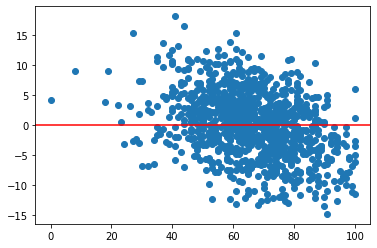

In [28]:
residuals = results.predict(X) - y 
residuals
plt.scatter(y,residuals)
plt.axhline(y=0, color = "red")

__Answer:__ The model appears to predict conservatively, i.e., it tends to overestimate where scores are low, and underestimate where the scores are high. This is also due to the natural boundaries in the plot, and thus the least-squares estimation accounts for the little skew in the residual plot.